# WeatherPy

---

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.image as mpimg
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Generate the Cities List by Using the `citipy` Library

In [83]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [84]:
# GET a sample of the api call - "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
sample_url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q=Cambridge"
sample = requests.get(sample_url).json()
pprint(sample)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 43.3601, 'lon': -80.3127},
 'dt': 1732976507,
 'id': 5913695,
 'main': {'feels_like': -10.89,
          'grnd_level': 979,
          'humidity': 86,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': -3.89,
          'temp_max': -3.6,
          'temp_min': -4.32},
 'name': 'Cambridge',
 'snow': {'1h': 0.2},
 'sys': {'country': 'CA',
         'id': 836,
         'sunrise': 1732970013,
         'sunset': 1733003225,
         'type': 1},
 'timezone': -18000,
 'visibility': 4023,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 249, 'gust': 12.43, 'speed': 7.84}}


In [85]:
# Set the API base URL
# using API call = "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"

url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval (typical runtime 12 mins)")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(f"Data Retrieval Completed at EST {timestamp}")
print("-----------------------------")

Beginning Data Retrieval (typical runtime 12 mins)
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | tikhoretsk
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | shimoda
Processing Record 6 of Set 1 | mount pleasant
Processing Record 7 of Set 1 | flying fish cove
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | kailua-kona
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | bay roberts
Processing Record 14 of Set 1 | bandarbeyla
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | ksar chellala
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | sitangkai
Processing Record 20 of Set 1 | tongouson
Processing Record 21 of Set 1 | hami
Processing Record 22 of 

In [86]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [87]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,-10.09,67,75,8.23,SJ,1732976643
1,tikhoretsk,45.8547,40.1253,2.51,67,22,3.41,RU,1732976644
2,afaahiti,-17.7500,-149.2833,25.57,84,100,6.29,PF,1732976645
3,tiksi,71.6872,128.8694,-19.90,98,100,2.92,RU,1732976646
4,shimoda,34.6667,138.9500,10.48,74,0,8.95,JP,1732976647


In [88]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [89]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-10.09,67,75,8.23,SJ,1732976643
1,tikhoretsk,45.8547,40.1253,2.51,67,22,3.41,RU,1732976644
2,afaahiti,-17.7500,-149.2833,25.57,84,100,6.29,PF,1732976645
3,tiksi,71.6872,128.8694,-19.90,98,100,2.92,RU,1732976646
4,shimoda,34.6667,138.9500,10.48,74,0,8.95,JP,1732976647


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

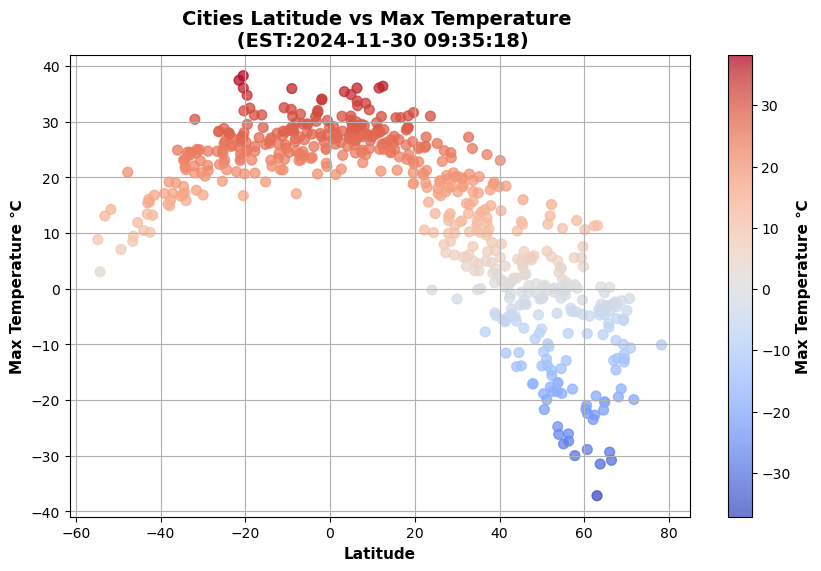

In [90]:
# Build scatter plot for latitude vs. temperature

# Set figure size
plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_temp = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], s=50, c=city_data_df['Max Temp'], cmap='coolwarm', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Cities Latitude vs Max Temperature \n (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Max Temperature \u2103", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_temp)
cbar.set_label('Max Temperature \u2103', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/CityTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

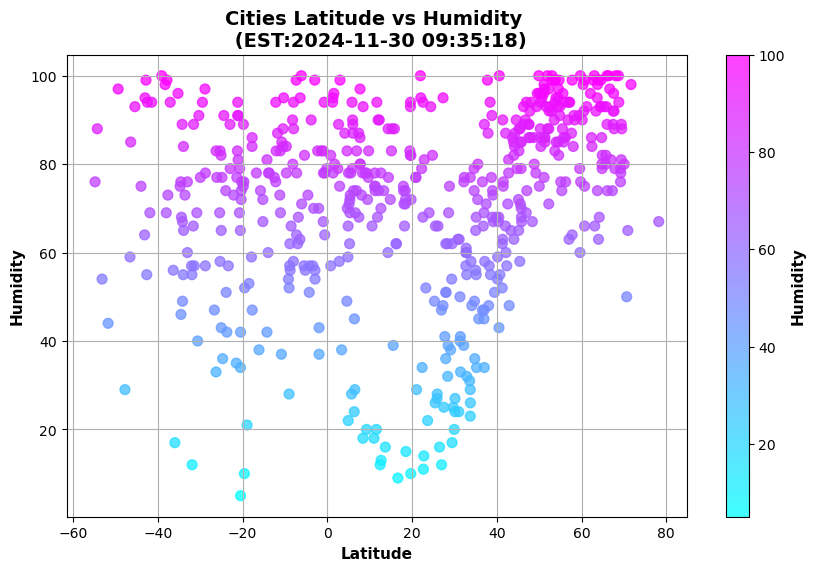

In [91]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_humid = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], s=50, c=city_data_df['Humidity'], cmap='cool', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Cities Latitude vs Humidity \n (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Humidity", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_humid)
cbar.set_label('Humidity', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/CityHumid.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

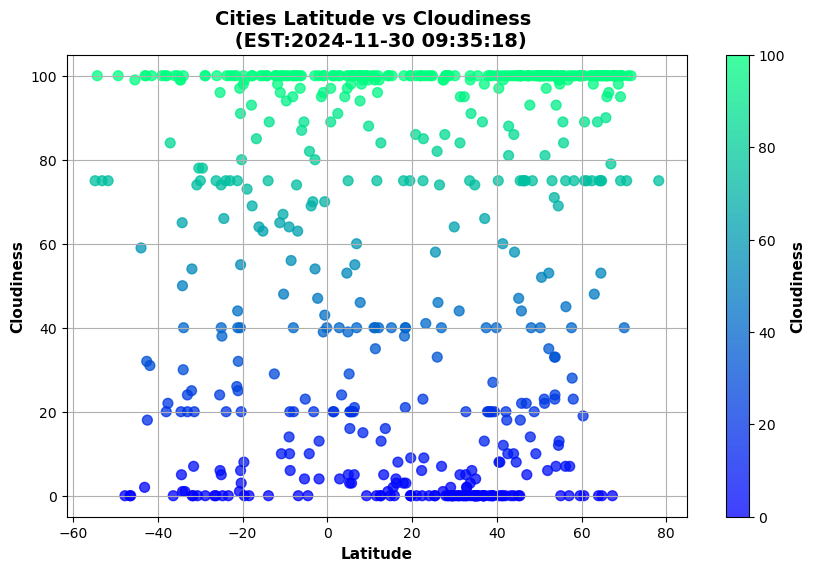

In [92]:
# Build the scatter plots for latitude vs. cloudiness

plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_clouds = plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], s=50, c=city_data_df['Cloudiness'], cmap='winter', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Cities Latitude vs Cloudiness \n (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Cloudiness", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_clouds)
cbar.set_label('Cloudiness', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/CityCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

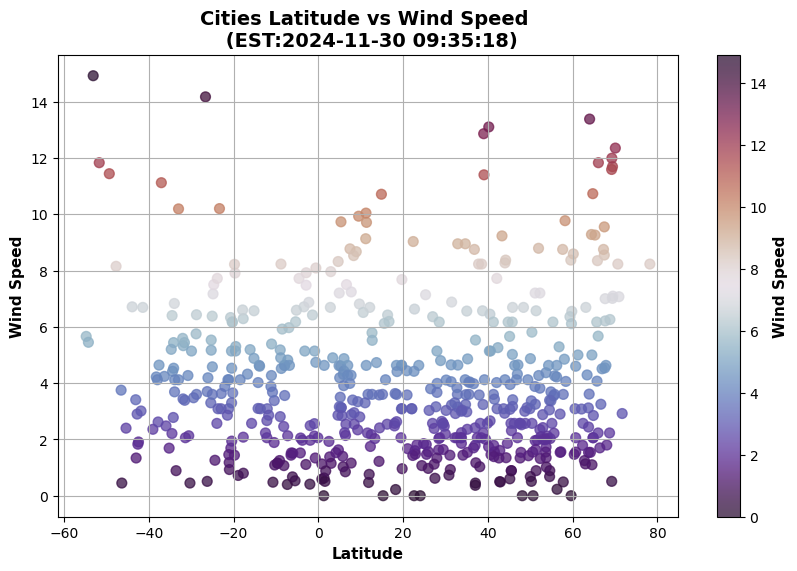

In [93]:
# Build the scatter plots for latitude vs. wind speed

plt.figure(figsize=(10, 6)) 
plt.grid()

# Use a colormap to represent temperature values
plot_wind = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], s=50, c=city_data_df['Wind Speed'], cmap='twilight_shifted', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Cities Latitude vs Wind Speed \n (EST:{timestamp})", fontweight='bold', fontsize=14)
plt.xlabel("Latitude", fontweight='bold', fontsize=11)
plt.ylabel("Wind Speed", fontweight='bold', fontsize=11)

# Add a color bar to show the temperature scale
cbar = plt.colorbar(plot_wind)
cbar.set_label('Wind Speed', fontweight='bold', fontsize=11)

# Save the figure
plt.savefig("output_data/CityWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title, color_map, save_path, text_x=0.95, text_y=0.95):
   
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.grid()
    scatter = plt.scatter(x_values, y_values, c=y_values, cmap=color_map, alpha=0.75)
    
    # Plot regression line
    regression_line = slope * x_values + intercept
    plt.plot(x_values, regression_line, color='red')
    
    # Incorporate other graph properties
    plt.title(title, fontweight='bold', fontsize=14)
    plt.xlabel(x_label, fontweight='bold', fontsize=11)
    plt.ylabel(y_label, fontweight='bold', fontsize=11)
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label(y_label, fontweight='bold', fontsize=11)
    
    # Add regression equation text at the specified position in bold
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(text_x, 
             text_y, 
             equation_text, 
             transform=plt.gca().transAxes, 
             fontsize=12, 
             verticalalignment='top', 
             horizontalalignment='right', 
             fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.5))
    
    # Save the figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()
    
    # Print regression statistics
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")

# Example 
# plot_linear_regression(city_data_df['Lat'], 
#                       city_data_df['Max Temp'], 
#                       "Latitude", 
#                       "Max Temperature \u2103", 
#                       f"City Latitude vs Max Temperature \n EST {timestamp}"", 
#                       'coolwarm',
#                       "output_data/Fig1.png", 
#                       text_x=0.95, 
#                       text_y=0.95)

In [95]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-10.09,67,75,8.23,SJ,1732976643
1,tikhoretsk,45.8547,40.1253,2.51,67,22,3.41,RU,1732976644
3,tiksi,71.6872,128.8694,-19.90,98,100,2.92,RU,1732976646
4,shimoda,34.6667,138.9500,10.48,74,0,8.95,JP,1732976647
5,mount pleasant,32.7941,-79.8626,6.14,61,0,3.60,US,1732976649


In [96]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,afaahiti,-17.7500,-149.2833,25.57,84,100,6.29,PF,1732976645
6,flying fish cove,-10.4217,105.6791,28.23,84,100,3.38,CX,1732976650
7,waitangi,-43.9535,-176.5597,10.46,75,59,6.71,NZ,1732976500
8,new norfolk,-42.7826,147.0587,16.07,99,100,2.90,AU,1732976652
11,puerto natales,-51.7236,-72.4875,14.25,44,75,11.83,CL,1732976264


###  Temperature vs. Latitude Linear Regression Plot

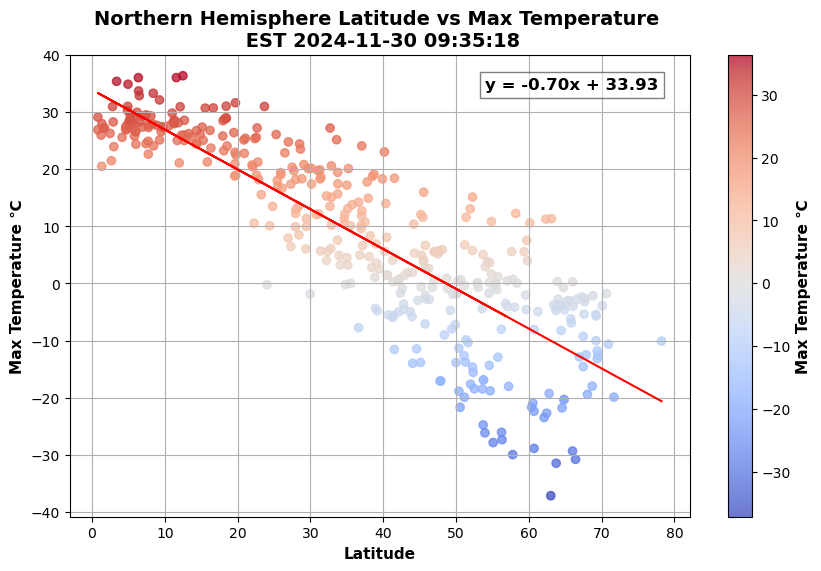

Slope: -0.6972249531191752
Intercept: 33.92734876070318
R-squared: 0.7314606345793127
P-value: 2.138848184845817e-113
Standard Error: 0.021391888102286594


In [97]:
# Linear regression on Northern Hemisphere

NorthHemiTemp = plot_linear_regression(northern_hemi_df['Lat'], 
                      northern_hemi_df['Max Temp'], 
                      "Latitude", 
                      "Max Temperature \u2103", 
                      f"Northern Hemisphere Latitude vs Max Temperature \n EST {timestamp}",  
                      'coolwarm',
                      "output_data/NorthHemiTemp.png", 
                      text_x=0.95, 
                      text_y=0.95)

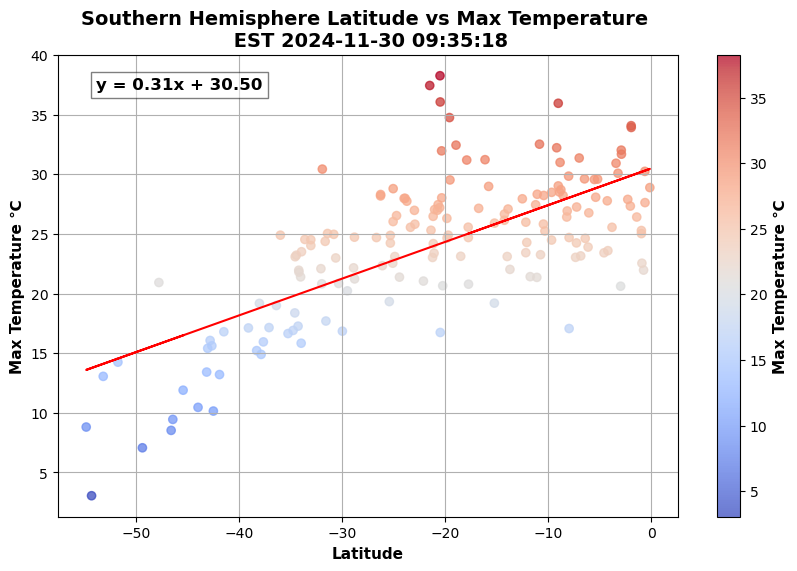

Slope: 0.3083159841873233
Intercept: 30.496987153183635
R-squared: 0.48542764335503663
P-value: 5.063038424165365e-26
Standard Error: 0.024490766269114013


In [98]:
# Linear regression on Southern Hemisphere

SouthHemiTemp = plot_linear_regression(southern_hemi_df['Lat'], 
                      southern_hemi_df['Max Temp'], 
                      "Latitude", 
                      "Max Temperature \u2103", 
                      f"Southern Hemisphere Latitude vs Max Temperature \n EST {timestamp}",
                      'coolwarm',
                      "output_data/SouthHemiTemp.png", 
                      text_x=0.33, 
                      text_y=0.95)

**Discussion about the linear relationship for temperature:** 

The max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere, with an r-value of -0.74. The max temperature appears show a strong positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.46.

By viewing the graphs above, we can see that Latitude and Max Temperature have a clear co-relation. For both hemispheres it is clear to see that as we approach 0 Latitude (equator) the Max Temperature increases, and the further away from 0 Latitude we go the Max Temperature will decrease.

### Humidity vs. Latitude Linear Regression Plot

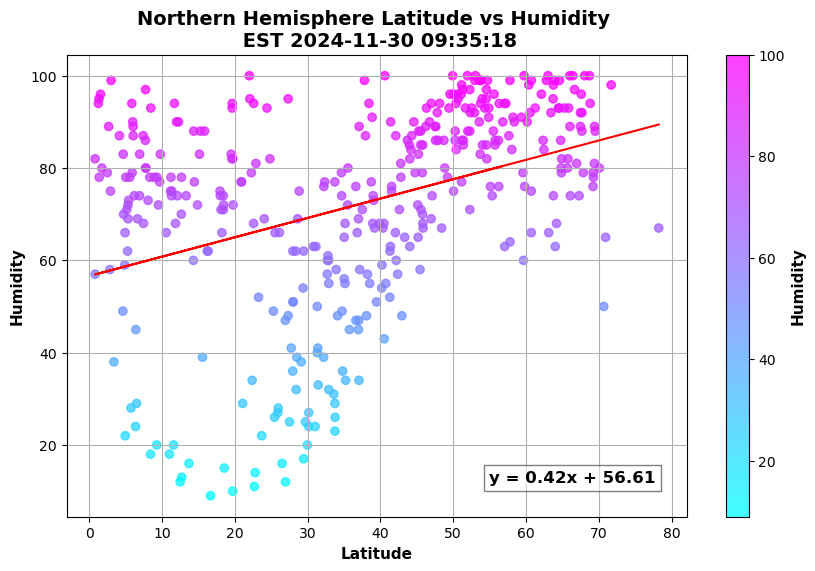

Slope: 0.41951635992122044
Intercept: 56.60717798207351
R-squared: 0.14056927743854689
P-value: 1.573169721465211e-14
Standard Error: 0.05252630235762739


In [99]:
# Northern Hemisphere

NorthHemiHumid = plot_linear_regression(northern_hemi_df['Lat'], 
                      northern_hemi_df['Humidity'], 
                      "Latitude", 
                      "Humidity", 
                      f"Northern Hemisphere Latitude vs Humidity \n EST {timestamp}",
                      'cool',
                      "output_data/NorthHemiHumid.png", 
                      text_x=0.95, 
                      text_y=0.1)

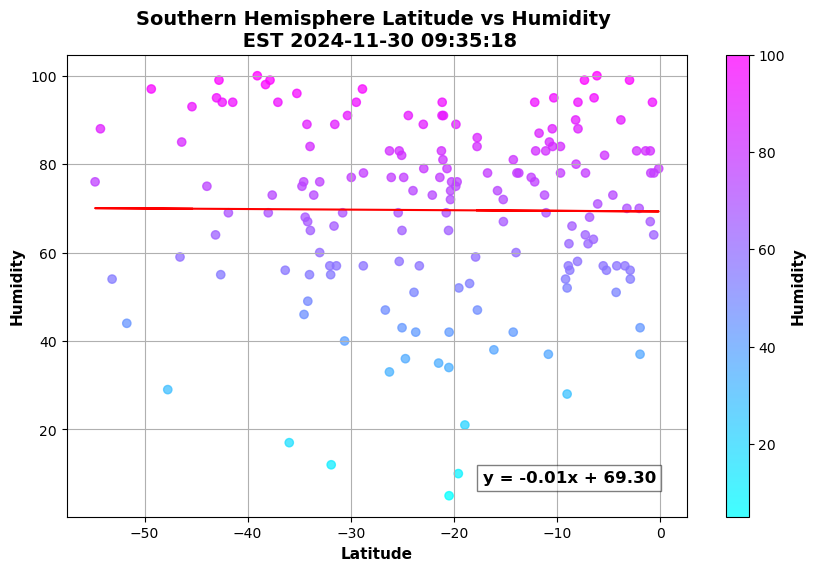

Slope: -0.013527791141949269
Intercept: 69.30414400112586
R-squared: 8.559198395394527e-05
P-value: 0.9046902128415022
Standard Error: 0.11280727676444978


In [100]:
# Southern Hemisphere

SouthHemiHumid = plot_linear_regression(southern_hemi_df['Lat'], 
                      southern_hemi_df['Humidity'], 
                      "Latitude", 
                      "Humidity", 
                      f"Southern Hemisphere Latitude vs Humidity \n EST {timestamp}",
                      'cool',
                      "output_data/SouthHemiHumid.png", 
                      text_x=0.95, 
                      text_y=0.1)

**Discussion about the linear relationship for Humidity:** 

The data seems to show that the lower the latitude, the less the humidity in both southern and northern hemispheres.

By viewing the graphs above, we can see that Latitude and Humidity have almost no relationship to view. In the northern hemisphere there is a greater correlation, however in the southern we can see that the r-value is nearly zero, implying that there is no linear association between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

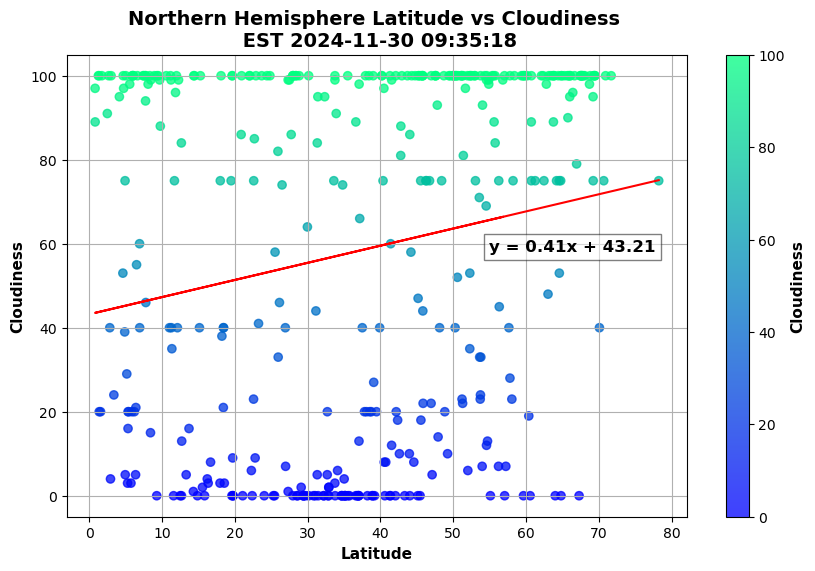

Slope: 0.40806510520207
Intercept: 43.21303828812533
R-squared: 0.037934947524587974
P-value: 0.00010396566755601109
Standard Error: 0.10405899585974594


In [101]:
# Northern Hemisphere

NorthHemiCloud = plot_linear_regression(northern_hemi_df['Lat'], 
                      northern_hemi_df['Cloudiness'], 
                      "Latitude", 
                      "Cloudiness", 
                      f"Northern Hemisphere Latitude vs Cloudiness \n EST {timestamp}",
                      'winter',
                      "output_data/NorthHemiCloud.png", 
                      text_x=0.95, 
                      text_y=0.6)

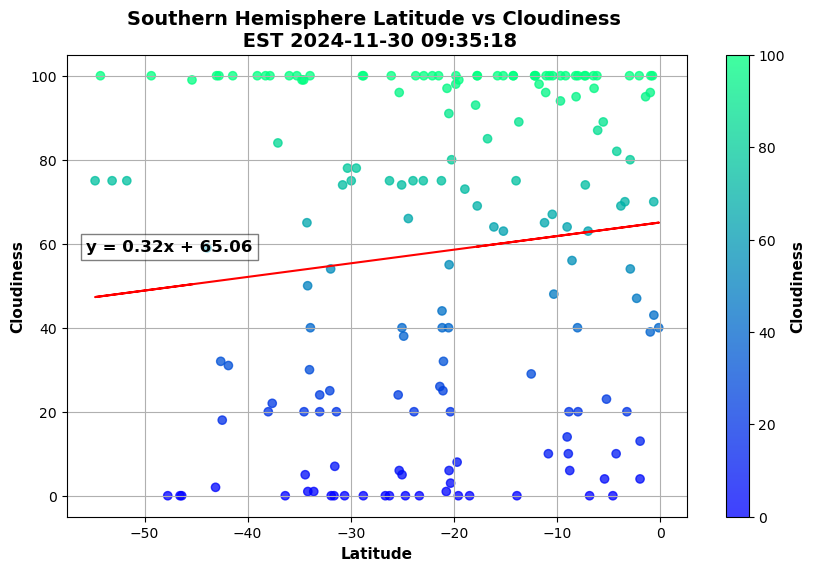

Slope: 0.3241060471567956
Intercept: 65.05935214460771
R-squared: 0.01325472138993579
P-value: 0.1349141476923783
Standard Error: 0.21574946134771764


In [102]:
# Southern Hemisphere

SouthHemiCloud = plot_linear_regression(southern_hemi_df['Lat'], 
                      southern_hemi_df['Cloudiness'], 
                      "Latitude", 
                      "Cloudiness", 
                      f"Southern Hemisphere Latitude vs Cloudiness \n EST {timestamp}",
                      'winter',
                      "output_data/SouthHemiCloud.png", 
                      text_x=0.3, 
                      text_y=0.6)

**Discussion about the linear relationship Cloudiness:** 

The data seems to show that the higher the latitude, the more cloudy it gets in the northern hemisphere.</br>
The data seems to show no relationship between cloudiness and latitude for the southern hemisphere.

By viewing the graphs above, we can see that Latitude and Cloudiness have almost no relationship to speak of. Compared to Latitude and Humidity, we can see that these 2 graphs have a similar r-value of ~0.2, this shows that there is a slight correlation but nothing large enough to consider usable.

### Wind Speed vs. Latitude Linear Regression Plot

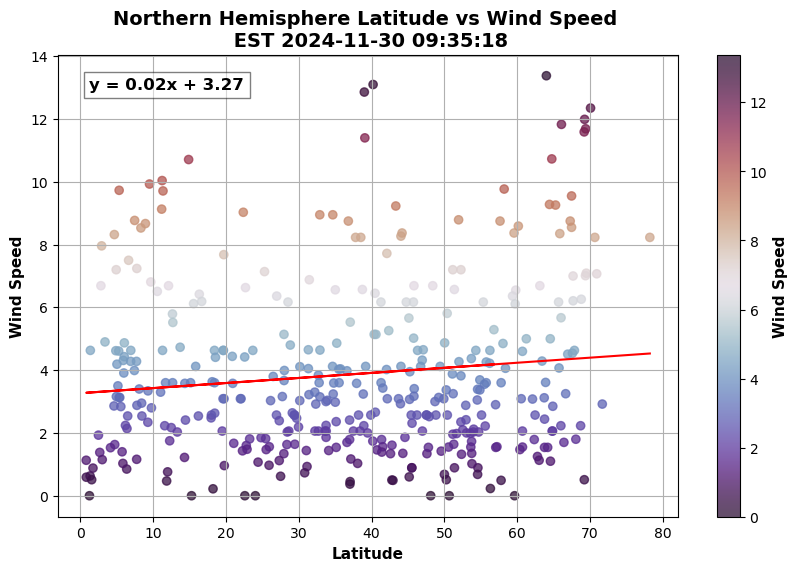

Slope: 0.016157600902601252
Intercept: 3.2668753100515167
R-squared: 0.01426211303373156
P-value: 0.018010776345212344
Standard Error: 0.006801948833185737


In [103]:
# Northern Hemisphere

NorthHemiWind = plot_linear_regression(northern_hemi_df['Lat'], 
                      northern_hemi_df['Wind Speed'], 
                      "Latitude", 
                      "Wind Speed", 
                      f"Northern Hemisphere Latitude vs Wind Speed \n EST {timestamp}",
                      'twilight_shifted',
                      "output_data/NorthHemiWind.png", 
                      text_x=0.3, 
                      text_y=0.95)

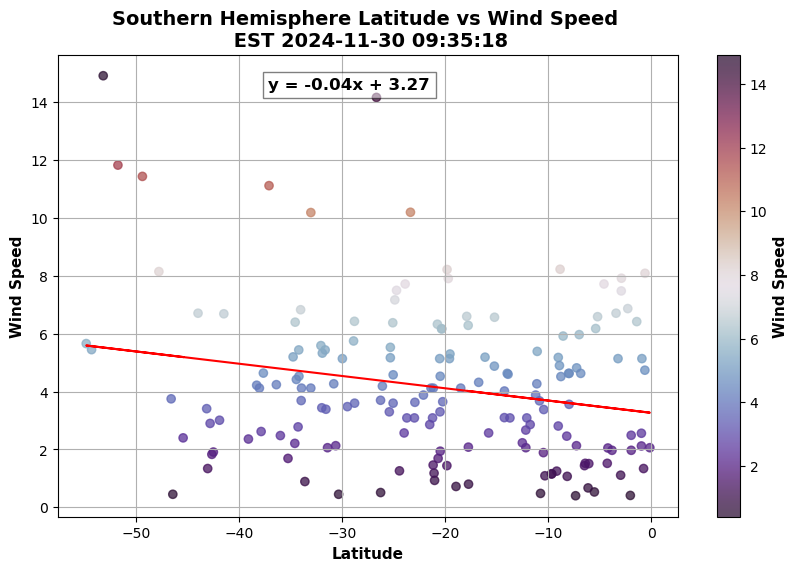

Slope: -0.04246621995089378
Intercept: 3.266008804618141
R-squared: 0.04939358067940203
P-value: 0.0035810934737776886
Standard Error: 0.014373220231627194


In [104]:
# Southern Hemisphere

SouthHemiWind = plot_linear_regression(southern_hemi_df['Lat'], 
                      southern_hemi_df['Wind Speed'], 
                      "Latitude", 
                      "Wind Speed", 
                      f"Southern Hemisphere Latitude vs Wind Speed \n EST {timestamp}",
                      'twilight_shifted',
                      "output_data/SouthHemiWind.png", 
                      text_x=0.6, 
                      text_y=0.95)

**Discussion about the linear relationship for Wind Speed:** 

The data seems to show no relationship between wind speed and latitude for both the northern and southern hemisphere.

By viewing the graphs above, we can see that Latitude and Cloudiness have literally no relationship to speak of whatsoever. Both the northern and southern hemispheres show that there is no change in wind speed as we get closer to or further away from 0 Latitude. They both have r-values of ~0.1 showing that these variables have basically no correlation.

_______________________________________________________________________________________
### Creating Combines figures for presentation

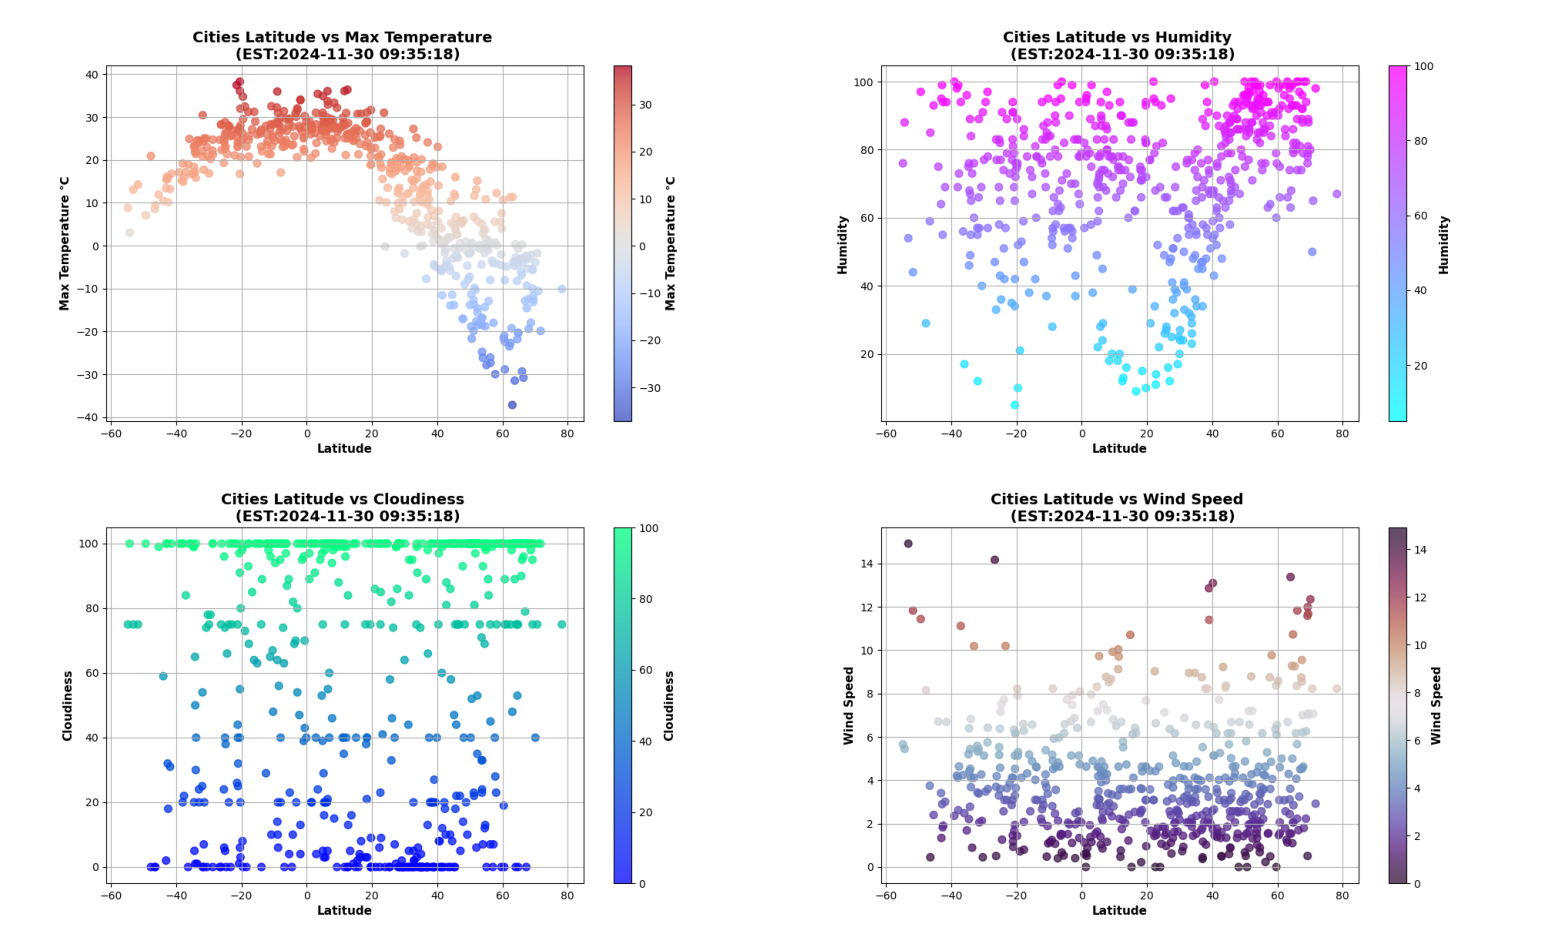

In [105]:
# Collecting all the plotted images as one grid
# List of image file paths
image_paths = ["output_data/CityTemp.png", "output_data/CityHumid.png", "output_data/CityCloud.png", "output_data/CityWind.png"]

# Create a 2x2 grid for the images
fig, axs = plt.subplots(2, 2, figsize=(20,12))

# Plot each image in the grid
for i, image_path in enumerate(image_paths):
    img = mpimg.imread(image_path)
    axs[i//2, i%2].imshow(img)
    axs[i//2, i%2].axis('off')  # Hide the axes

# Adjust layout to decrease the distance between images 
plt.subplots_adjust(hspace=0, wspace=0)

# Save the figure
plt.savefig("output_data/CityPlots.png")

# Show plot
plt.show()


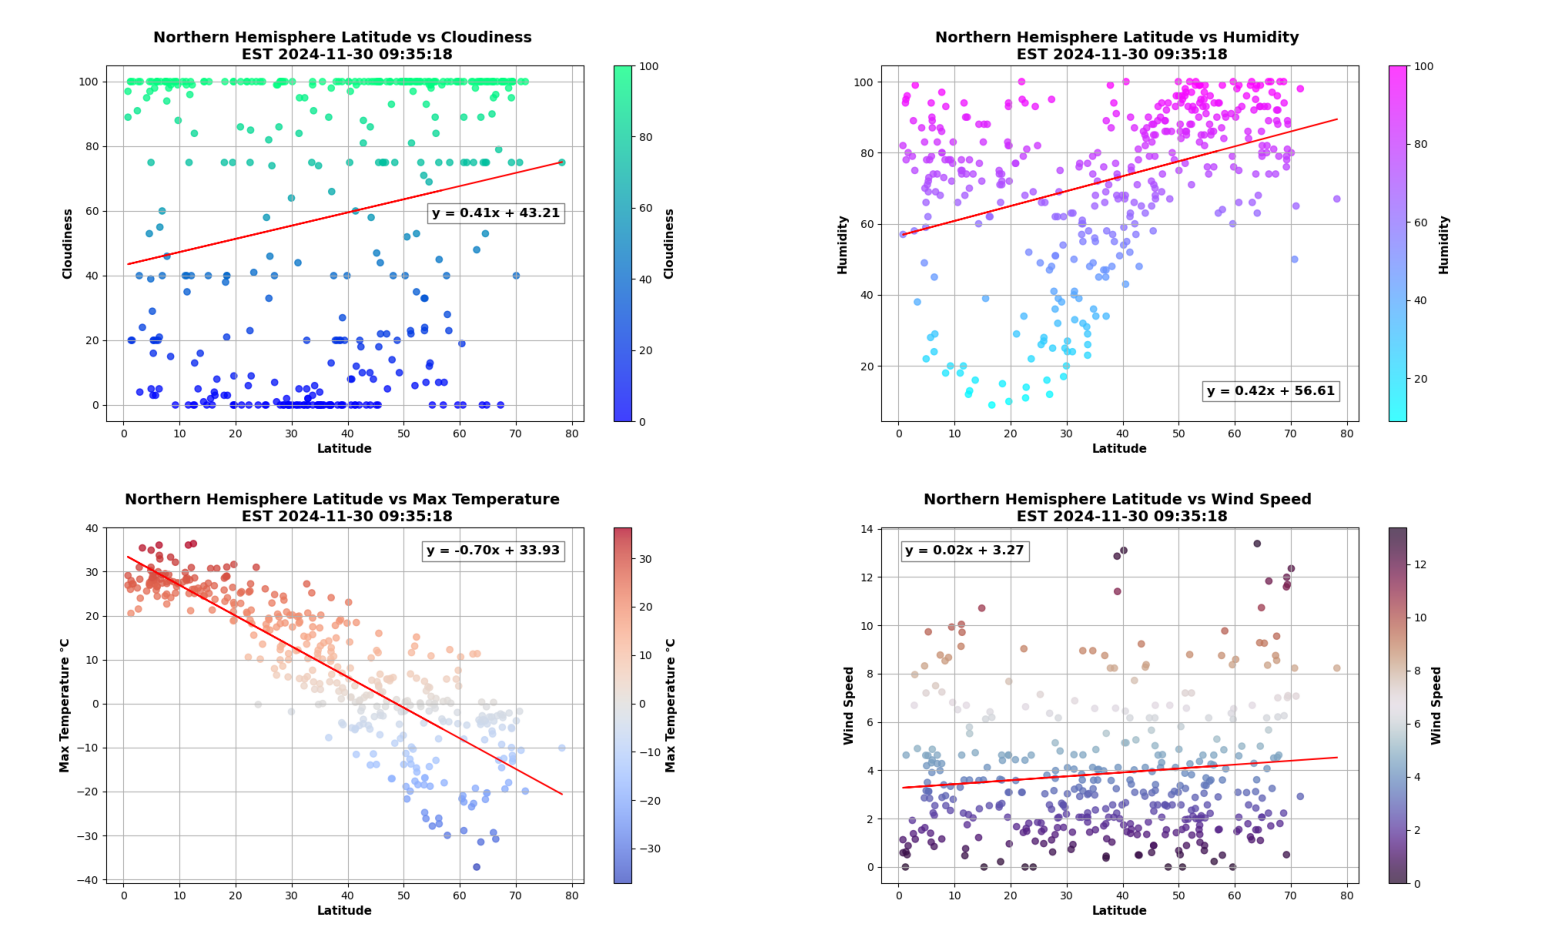

In [106]:
# Collecting all the plotted images for Northern Hemisphereas one grid
# List of image file paths
north_image_paths = ["output_data/NorthHemiCloud.png", "output_data/NorthHemiHumid.png", "output_data/NorthHemiTemp.png", "output_data/NorthHemiWind.png"]

# Create a 2x2 grid for the images
fig, axs = plt.subplots(2, 2, figsize=(20,12))

# Plot each image in the grid
for i, north_image_paths in enumerate(north_image_paths):
    img = mpimg.imread(north_image_paths)
    axs[i//2, i%2].imshow(img)
    axs[i//2, i%2].axis('off')  # Hide the axes

# Adjust layout to decrease the distance between images 
plt.subplots_adjust(hspace=0, wspace=0)

# Save the figure
plt.savefig("output_data/NorthHemiPlots.png")

# Show plot
plt.show()

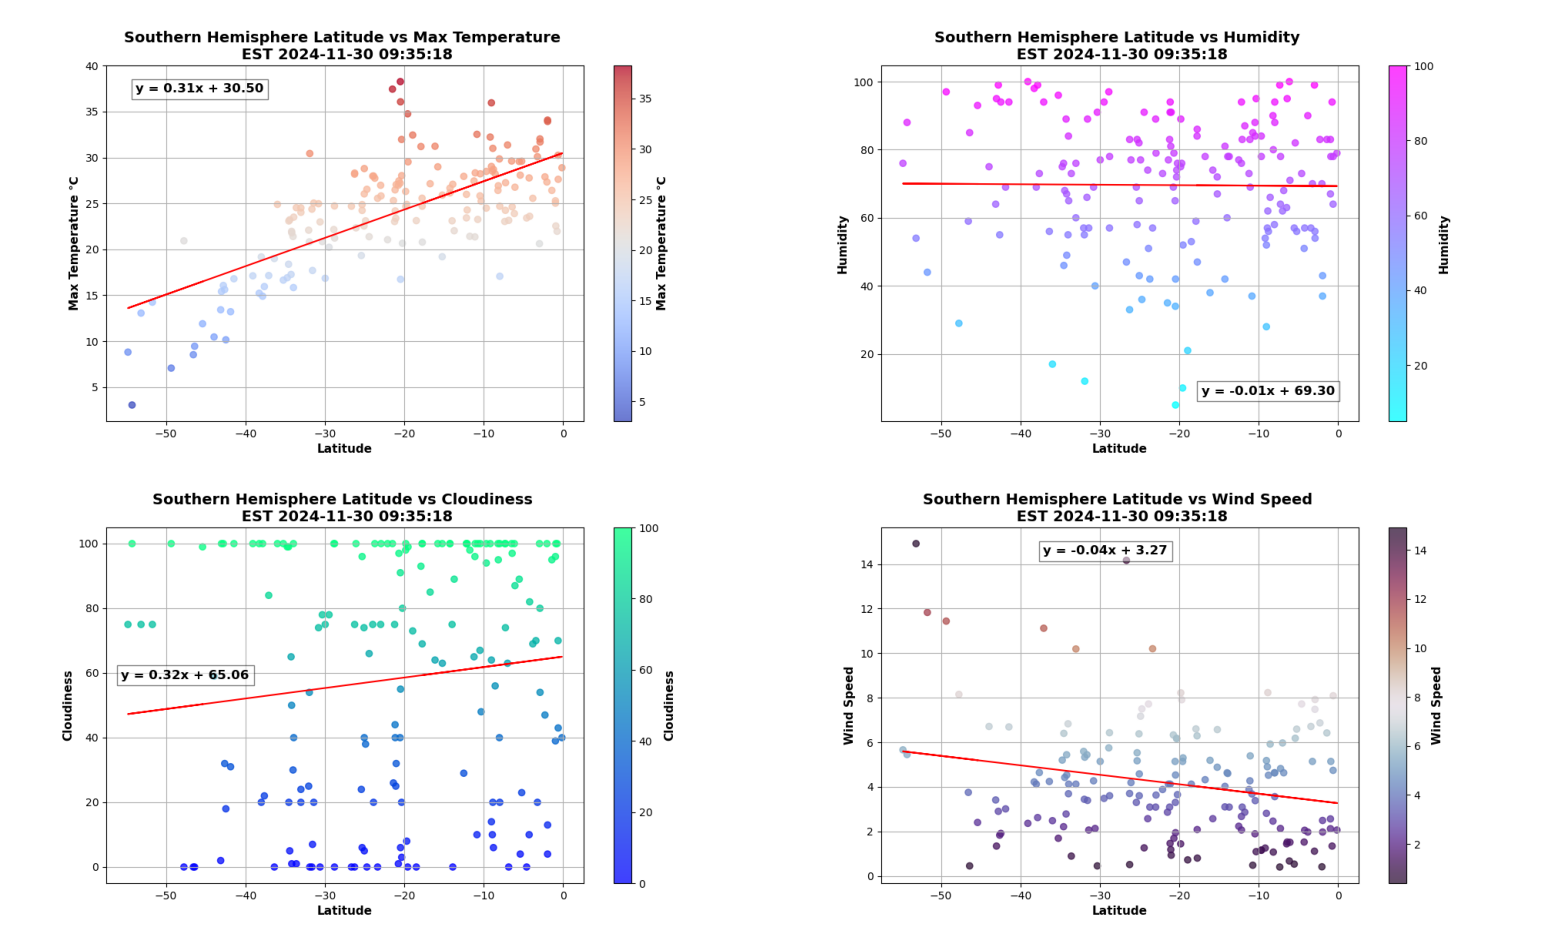

In [107]:
# Collecting all the plotted images for Southern Hemisphere as one grid
# List of image file paths
south_image_paths = ["output_data/SouthHemiTemp.png", "output_data/SouthHemiHumid.png", "output_data/SouthHemiCloud.png", "output_data/SouthHemiWind.png"]

# Create a 2x2 grid for the images
fig, axs = plt.subplots(2, 2, figsize=(20,12))

# Plot each image in the grid
for i, south_image_paths in enumerate(south_image_paths):
    img = mpimg.imread(south_image_paths)
    axs[i//2, i%2].imshow(img)
    axs[i//2, i%2].axis('off')  # Hide the axes

# Adjust layout to decrease the distance between images 
plt.subplots_adjust(hspace=0, wspace=0)

# Save the figure
plt.savefig("output_data/SouthHemiPlots.png")

# Show plot
plt.show()